#  <center> $\text{Jid}\acute{e}$ $\text{Anene}$  </center>
# <center> ID:3053629 </center>



 Auxillary Graphing Function

In [41]:
import matplotlib.pyplot as plt

#Helper function to graph two series on same axis
def get_xaxis(series1, series2):
    """
    get_xaxis: list list -> list list list
    Takes as input
    """
    series = max(series1,series2, key = lambda t: len(t))
    if series == series1:
        n= len(series1)
        series2 = series2+ (n-len(series2))*[np.nan]
    else:
        n = len(series2)
        series1 = series1+ (n-len(series1))*[np.nan]
    return series1, series2, list(range(0,n))

def compare_runs(batch_cost_hist,minibatch_cost_hist,minibatch_cost_hist_2):
    # create figure and color pattern
    fig = plt.figure(figsize = (10,3))
    colors = ['k','magenta','aqua','blueviolet','chocolate']

    ### plot all with respect to smallest mini-batch size ###
    ax = plt.subplot(1,2,1)

    # count number of steps in different runs
    num_stoch = len(minibatch_cost_hist)
    num_mini = len(minibatch_cost_hist_2)
    num_full = len(batch_cost_hist)

    # plot stochastic
    ax.plot(minibatch_cost_hist, label='batch size = 1',c = colors[0],linewidth=1.5)

    # plot mini and full batch with respect to stochastic
    range_mini = np.linspace(0,num_stoch,num_mini)
    ax.plot(range_mini,minibatch_cost_hist_2, label='batch size = 10',c = colors[1],linewidth=1)
    ax.scatter(range_mini,minibatch_cost_hist_2,c=colors[1],s=90,edgecolor = 'w',linewidth=0.5)

    range_full = np.linspace(0,num_stoch,num_full)
    ax.plot(range_full,batch_cost_hist, label='full batch',c = colors[2],linewidth=1)
    ax.scatter(range_full,batch_cost_hist,c=colors[2],s=90,edgecolor = 'w',linewidth=0.5)

    # label panel
    ax.set_title('progress with respect to batch size = 1 method')
    ax.set_xlabel('single summand')
    #plt.legend(loc = 1)

    ### plot with respect to epoch number ###
    ax = plt.subplot(1,2,2)

    # plot stochastic batch
    inds_stoch = np.linspace(0,num_stoch,num_full)
    inds_stoch = [int(v) for v in inds_stoch]
    inds_stoch[-1]-=1
    plot_stoch = [minibatch_cost_hist[v] for v in inds_stoch]
    ax.plot(plot_stoch, label='batch size = 1',c = colors[0],linewidth=1.5)
    ax.scatter(np.arange(num_full),plot_stoch,c=colors[0],s=90,edgecolor = 'w',linewidth=0.5)

    # plot mini and full batch with respect to stochastic
    inds_mini = np.linspace(0,num_mini,num_full)
    inds_mini = [int(v) for v in inds_mini]
    inds_mini[-1]-=1
    plot_mini = [minibatch_cost_hist_2[v] for v in inds_mini]
    ax.plot(plot_mini, label='batch size = 10',c = colors[1],linewidth=1)
    ax.scatter(np.arange(num_full),plot_mini,c=colors[1],s=90,edgecolor = 'w',linewidth=0.5)

    # plot full cost
    ax.plot(batch_cost_hist, label='full batch',c = colors[2],linewidth=1)
    ax.scatter(np.arange(num_full),batch_cost_hist,c=colors[2],s=90,edgecolor = 'w',linewidth=0.5)
    ax.set_title('progress with respect to full batch method')
    ax.set_xticks(np.arange(num_full))
    ax.set_xlabel('full epochs')

    # plot all with respect to epoch number
    plt.show()
    



# Chapter 3: Exercise 11 -momentum accelerated gradient descent: 

Code up the the momentum accelerated gradient descent with w/ two choices of $\beta \in \{0.2,0.7\}$, all runs  are initialized at the same point $\mathbf{w}^0=\begin{bmatrix}10 \\ 1 \end{bmatrix}$, learning rate $\alpha=10^{-1}$, and quadratic cost function $g(\mathbf{w})=a+\mathbf{b}^T\mathbf{w}+\mathbf{w}^T\mathbf{C}\mathbf{w}$ where $\mathbf{C} = \begin{bmatrix}0.1 & 0 \\ 0 & 12 \end{bmatrix}$, $a=0$, $\mathbf{b} = \begin{bmatrix}0 \\ 0 \end{bmatrix}$. Do this for 25 runs.


Gradient Descent[beta=2/10] Optimal Value: 3.85197601103165
Gradient Descent[beta=2/10] Optimal Input Value: [[6.08166043e+00]
 [1.89898799e-09]]
Number of update steps for Gradient Descent[beta=2/10]: 25 

Gradient Descent[beta=7/10] Optimal Value: 4.447207810726263
Gradient Descent[beta=7/10] Optimal Input Value: [[ 6.52058766]
 [-0.02428971]]
Number of update steps for Gradient Descent[beta=7/10]: 25 



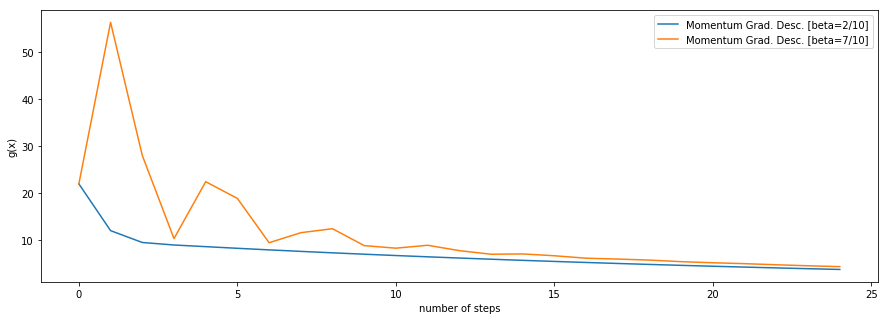

In [42]:
#Momentum Accelerated Gradient Descent
def momentum_GradDesc(g, dwdg, K, alpha, beta,  w0):
    k = 0
    w = np.copy(w0)
    g_val = g(w)
    d = -1*dwdg(w)

    results = []

    while k < K:

        d_next = beta*d+(1-beta)*dwdg(w)
        w_next = w-alpha(k)*d_next
        results.append(g(w)[0,0])

        k+=1
        w = w_next
        d = d_next
        
    return w, results[-1], results

#Alpha = 1/10
alpha = lambda k: 1/float(10)

#Iterations
K = 25

#Initial point
w0 =np.array([10,1]).reshape((2,1))

#Function we are minimizing
g=lambda w : np.dot(w.T, np.dot(np.array([[0.1, 0], [0, 12]]),w))

#Derivative function 
dwdg = grad(g)


#Run gradient descent for beta in {2/10, 7/10 }
beta_2 = 2/10
momentum_GradDesc_2 = momentum_GradDesc(g, dwdg, K, alpha, beta_2, w0)
beta_7 = 7/10
momentum_GradDesc_7 = momentum_GradDesc(g, dwdg, K, alpha,  beta_7, w0)

#Print the Results
print("Gradient Descent[beta=2/10] Optimal Value:", momentum_GradDesc_2[1])
print("Gradient Descent[beta=2/10] Optimal Input Value:",  momentum_GradDesc_2[0])
print("Number of update steps for Gradient Descent[beta=2/10]:",str(len(momentum_GradDesc_2[2])),"\n")

print("Gradient Descent[beta=7/10] Optimal Value:", momentum_GradDesc_7[1])
print("Gradient Descent[beta=7/10] Optimal Input Value:", momentum_GradDesc_7[0])
print("Number of update steps for Gradient Descent[beta=7/10]:",str(len(momentum_GradDesc_7[2])),"\n")

#Graph Results
m_GradDesc_2, m_GradDesc_7, xi = get_xaxis(momentum_GradDesc_2[2], momentum_GradDesc_7[2])
plt.plot( xi, m_GradDesc_2, label='Momentum Grad. Desc. [beta=2/10]')
plt.plot( xi, m_GradDesc_7,label='Momentum Grad. Desc. [beta=7/10]')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()

# Chapter 3: Exercise 12- Slow-crawling behavior of gradient descent
Compare the standard and fully normalized gradient descent schemes in minimizing the function $g(w_0,w_1)=\text{tanh}(4w_0+4w_1)+\max(1,w_0^2\cdot\frac{2}{5})+1$. Initialize at $\mathbf{w}^0=\begin{bmatrix} 2 \\ 2 \end{bmatrix}$, with 1000 steps, $\alpha=10^{-1}$.



Grad. Desc. Optimal Value: [[3.6]]
Grad. Desc. Optimal Input Value: [1.5574, 2.0]
Number of update steps for Grad. Desc. : 1000 

Full Norm. Grad. Desc. Optimal Value: 1.0
Full Norm. Grad. Desc. Optimal Input Value: [-1.5403, -4.1403]
Number of update steps for Full Norm. Grad. Desc.: 1000 



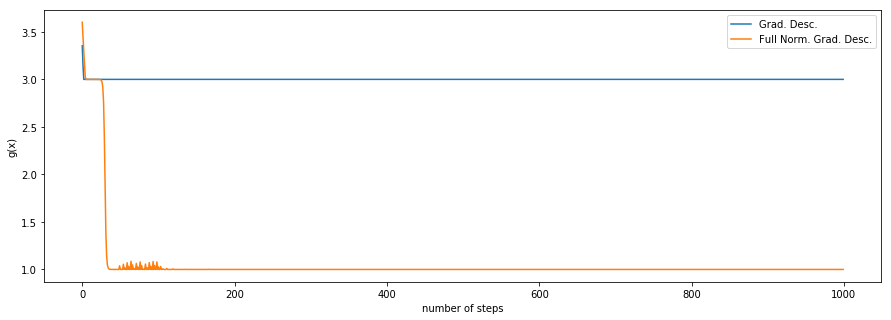

In [43]:
#Standard Gradient Descent Algorithm
def gradient_descent(g, dwdg, K, alpha,  w0):
    k = 0
    w = w0
    g_val = g(w)
    results = []

    while k < K:
        w = w-dwdg(w)*alpha(k)
        results.append(g(w)[0,0])
        k+=1
    return w, g_val, results

#Fully Normalized Gradient Descent Algorithm
def fullnorm_GradDesc(g, dwdg, K, alpha,  w0, epsilon):
    k = 0
    w = w0
    g_val = g(w)
    results = []
      
    while k < K:
        derivative = dwdg(w)
        w_next = w- (alpha(k)/(np.linalg.norm(derivative)+epsilon))*derivative
        results.append(g(w)[0,0])

        w = w_next
        k+=1
    return w, results[-1], results

#set epsilon to the machine epsilon 
epsilon = np.finfo(float).eps

#Alpha = 1/10
alpha = lambda k: 1/float(10)

#Iterations
K = 1000

#Initial point
w0 =np.array([2,2]).reshape((2,1))

#Function we are minimizing
g=lambda w : np.tanh(np.dot(np.full((1,2), 4),w))+1+max(1,0.4*w[0,0]**2)

#Piecewise partial derivative function
def dwdg(w):
    _dwdg_ = grad(lambda w: np.tanh(np.dot(np.full((1,2), 4),w)))
    if (w[0,0]**2)*(2/5)<= 1:
        return _dwdg_(w)
    else:
        _dw0dg2_ =grad(lambda w: np.dot(w.T, np.dot(np.array([[0.4, 0], [0, 0]]),w)))
        return _dwdg_(w)+_dw0dg2_(w)

#Run gradient descent and fully normalized gradient descent. 
graddesc= gradient_descent(g, dwdg, K, alpha, w0)
fullnorm_graddesc = fullnorm_GradDesc(g, dwdg, K, alpha, w0, epsilon)       


#Print the Results
print("Grad. Desc. Optimal Value:", graddesc[1])
print("Grad. Desc. Optimal Input Value:", [round(x[0], 4) for x in graddesc[0]])
print("Number of update steps for Grad. Desc. :",str(len(graddesc[2])),"\n")

print("Full Norm. Grad. Desc. Optimal Value:", fullnorm_graddesc[1])
print("Full Norm. Grad. Desc. Optimal Input Value:", [round(x[0], 4) for x in fullnorm_graddesc[0]])
print("Number of update steps for Full Norm. Grad. Desc.:",str(len(fullnorm_graddesc[2])),"\n")

#Graph Results
g_desc, ng_desc, xi = get_xaxis(graddesc[2], fullnorm_graddesc[2])
plt.plot( xi, g_desc, label='Grad. Desc.')
plt.plot( xi, ng_desc,label='Full Norm. Grad. Desc.')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()

# Chapter 3: Exercises 13-Comparing normalized gradient descent schemes
Code up the full and component-wise normalized gradient descent schemes and repeat the what you did the last problem. 

Component Norm. Grad. Desc. Optimal Value: 1.0
Component Norm. Grad. Desc Optimal Input Value: [-1.5376, -4.1486]
Number of update steps for Component Norm. Grad. Desc : 1000 

Full Norm. Grad. Desc. Optimal Value: 1.0
Full Norm. Grad. Desc. Optimal Input Value: [-1.5403, -4.1403]
Number of update steps for Full Norm. Grad. Desc.: 1000 



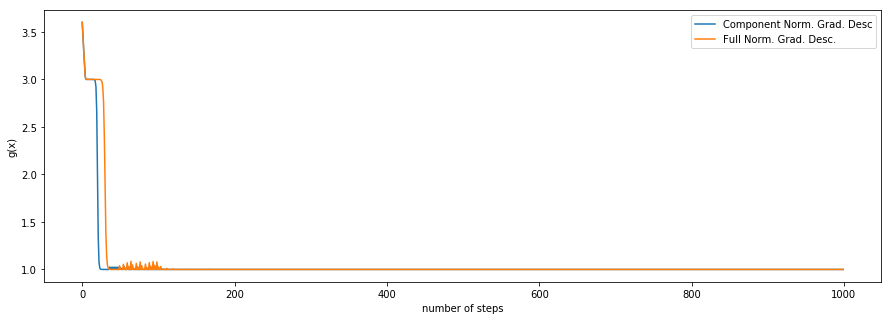

In [33]:
def componentnorm_GradDesc(g, dwdg, K, alpha,  w0,epsilon):
    k = 0
    w = w0
    g_val = g(w)
    results = []
      
    while k < K:
        derivative = dwdg(w)
        w_next = w- np.array([(alpha(k)/(np.linalg.norm(df)+epsilon))*df for df in derivative]).reshape((2,1))
        results.append(g(w)[0,0])

        w = w_next
        k+=1
    return w, results[-1], results

#Alpha = 1/10
alpha = lambda k: 1/float(10)

#Iterations
K = 1000

#Initial point
w0 =np.array([2,2]).reshape((2,1))

#Function we are minimizing
g=lambda w : np.tanh(np.dot(np.full((1,2), 4),w))+1+max(1,0.4*w[0,0]**2)

#Piecewise partial derivative function
def dwdg(w):
    _dwdg_ = grad(lambda w: np.tanh(np.dot(np.full((1,2), 4),w)))
    if (w[0,0]**2)*(2/5)< 1:
        return _dwdg_(w)
    else:
        _dw0dg2_ =grad(lambda w: np.dot(w.T, np.dot(np.array([[0.4, 0], [0, 0]]),w)))
        return _dwdg_(w)+_dw0dg2_(w)

#Run gradient descent and fully normalized gradien descent. 
component_graddesc= componentnorm_GradDesc(g, dwdg, K, alpha, w0, epsilon)
fullnorm_graddesc = fullnorm_GradDesc(g, dwdg, K, alpha, w0, epsilon)       


#Print the Results
print("Component Norm. Grad. Desc. Optimal Value:", component_graddesc[1])
print("Component Norm. Grad. Desc Optimal Input Value:", [round(x[0], 4) for x in component_graddesc[0]])
print("Number of update steps for Component Norm. Grad. Desc :",str(len(component_graddesc[2])),"\n")

print("Full Norm. Grad. Desc. Optimal Value:", fullnorm_graddesc[1])
print("Full Norm. Grad. Desc. Optimal Input Value:", [round(x[0], 4) for x in fullnorm_graddesc[0]])
print("Number of update steps for Full Norm. Grad. Desc.:",str(len(fullnorm_graddesc[2])),"\n")

#Graph Results
c_desc, ng_desc, xi = get_xaxis(component_graddesc[2], fullnorm_graddesc[2])
plt.plot( xi, c_desc, label='Component Norm. Grad. Desc')
plt.plot( xi, ng_desc,label='Full Norm. Grad. Desc.')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[20,5]
plt.rcParams["font.size"]=10
plt.show()

# Chapter 3: Exercise 14 - Mini-batch gradient descent
Compare the full batch and two mini-batch runs (using batch-size 1 and 10 respectively) employing the standard gradient descent scheme. The function $g$ we minimiize in these various runs is a sum of $P=100$ single input convex  quadratic function $g_p(w)= a_p+b_pw+c_pw^2$ whose parameters have been chosed at random from a normal distribution with zero mean and unit standard deviation. Function $g$ takes the form \begin{equation}
g\left(\mathbf{w}\right) = \sum_{p=1}^P g_p(w) = \sum_{p=1}^P\left( a^{\,}_p + b_pw + c_pw^2\right)
\end{equation}. All three runs use same (random) initial point $w^0=0$ and learning rate $\alpha=10^0$ and takes two epochs each method.  In particular, compare two epochs of the full batch method with two epochs of a run using mini-batch sizes  1  and  10 . In each instance, just measure the total cost function value after each epoch (or sweep through the cost function summands).


Batch[Full] Grad. Desc. Optimal Value: [[0.11074143]]
Batch[Full] Grad. Desc. Optimal Input Value: 0.0065
Number of update steps for Batch[Full] Grad. Desc. : 3 

Batch[10] Grad. Desc. Optimal Value: [[0.00959319]]
Batch[10] Grad. Desc. Optimal Input Value: 0.0063
Number of update steps for Batch[10] Grad. Desc. : 21 

Batch[1] Grad. Desc. Optimal Value: [[0.00019395]]
Batch[1] Grad. Desc. Optimal Input Value: 0.0089
Number of update steps for Batch[1] Grad. Desc. : 201 



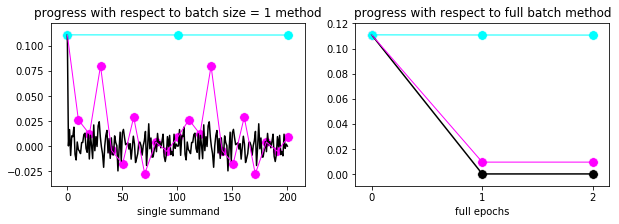

In [34]:
from sklearn.externals import joblib

# load in weights of random convex quadratics
coeffs = joblib.load('coeffs/random_quadratic_weights.pkl') 

#Size of the function
P = len(coeffs)

#Batch gradient descent
def batch_gradient_descent(g, dwdg, K, alpha, w0, batchsize, P):
    k = 0
    w = np.copy(w0)
    g_val = g(w,range(0,P))
    results = [g_val]

    while k<K:
        for i in range(0,P,batchsize):
            w_next = w-alpha(k)*float(dwdg(w,range(i,i+batchsize)))
            results.append(g(w_next,range(i,i+batchsize)))
            w = w_next
        k+=1
    return w, results[-1], results

def g(w,iter):
    cost = 0
    for i in iter:
        # get quadratic
        coeff = coeffs[i]
        a = coeff[0]
        b = coeff[1]
        c = coeff[2]

        # add to term
        cost += (a + b*w + c*w**2)
    return cost/P

#iter-based function for gradient of sum of quadratics
def dwdg(w,iter):
    derivative = 0
    for i in iter:
        # get quadratic
        coeff = coeffs[i]
        a = coeff[0]
        b = coeff[1]
        c = coeff[2]

        # add to term
        derivative += (b + 2*c*w)
    return derivative/P

#Alpha = 10^0
alpha = lambda k: 10**0

#Iterations
K = 2

#Initial Point
w0 = 0

#Full Batch Size 
batch_graddesc_full= batch_gradient_descent(g, dwdg, K, alpha, w0, P, P)
#Batch Size of ten
batch_graddesc_10 = batch_gradient_descent(g, dwdg, K, alpha, w0, 10, P)  
#Batch Size of 1
batch_graddesc_1 = batch_gradient_descent(g, dwdg, K, alpha, w0, 1, P) 

#Print the Results
print("Batch[Full] Grad. Desc. Optimal Value:", batch_graddesc_full[1])
print("Batch[Full] Grad. Desc. Optimal Input Value:", round(batch_graddesc_full[0], 4))
print("Number of update steps for Batch[Full] Grad. Desc. :",str(len(batch_graddesc_full[2])),"\n")

print("Batch[10] Grad. Desc. Optimal Value:", batch_graddesc_10[1])
print("Batch[10] Grad. Desc. Optimal Input Value:", round(batch_graddesc_10[0], 4))
print("Number of update steps for Batch[10] Grad. Desc. :",str(len(batch_graddesc_10[2])),"\n")

print("Batch[1] Grad. Desc. Optimal Value:", batch_graddesc_1[1])
print("Batch[1] Grad. Desc. Optimal Input Value:", round(batch_graddesc_1[0], 4))
print("Number of update steps for Batch[1] Grad. Desc. :",str(len(batch_graddesc_1[2])),"\n")

compare_runs([x[0,0] for x in batch_graddesc_full[2]],[x[0,0] for x in batch_graddesc_1[2]],[x[0,0] for x in batch_graddesc_10[2]])

For a sanity check below are the results when $w^0=0.5$.

Batch[Full] Grad. Desc. Optimal Value: [[0.18780593]]
Batch[Full] Grad. Desc. Optimal Input Value: 0.3111
Number of update steps for Batch[Full] Grad. Desc. : 3 

Batch[10] Grad. Desc. Optimal Value: [[0.00957764]]
Batch[10] Grad. Desc. Optimal Input Value: 0.0156
Number of update steps for Batch[10] Grad. Desc. : 21 

Batch[1] Grad. Desc. Optimal Value: [[0.00030331]]
Batch[1] Grad. Desc. Optimal Input Value: 0.0219
Number of update steps for Batch[1] Grad. Desc. : 201 



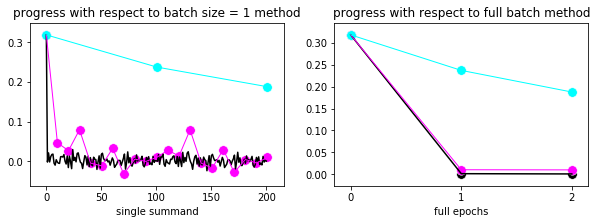

In [35]:
#Initial Point
w0 = 0.5

#Full Batch Size 
batch_graddesc_full= batch_gradient_descent(g, dwdg, K, alpha, w0, P, P)
#Batch Size of ten
batch_graddesc_10 = batch_gradient_descent(g, dwdg, K, alpha, w0, 10, P)  
#Batch Size of 1
batch_graddesc_1 = batch_gradient_descent(g, dwdg, K, alpha, w0, 1, P) 

#Print the Results
print("Batch[Full] Grad. Desc. Optimal Value:", batch_graddesc_full[1])
print("Batch[Full] Grad. Desc. Optimal Input Value:", round(batch_graddesc_full[0], 4))
print("Number of update steps for Batch[Full] Grad. Desc. :",str(len(batch_graddesc_full[2])),"\n")

print("Batch[10] Grad. Desc. Optimal Value:", batch_graddesc_10[1])
print("Batch[10] Grad. Desc. Optimal Input Value:", round(batch_graddesc_10[0], 4))
print("Number of update steps for Batch[10] Grad. Desc. :",str(len(batch_graddesc_10[2])),"\n")

print("Batch[1] Grad. Desc. Optimal Value:", batch_graddesc_1[1])
print("Batch[1] Grad. Desc. Optimal Input Value:", round(batch_graddesc_1[0], 4))
print("Number of update steps for Batch[1] Grad. Desc. :",str(len(batch_graddesc_1[2])),"\n")

compare_runs([x[0,0] for x in batch_graddesc_full[2]],[x[0,0] for x in batch_graddesc_1[2]],[x[0,0] for x in batch_graddesc_10[2]])

# Chapter 4: Exercises 4 - Newtons method I 
Use Newton's method to minimize the function $g(w) = \frac{1}{50}(w^4+w^2+10w)+0.5$ beginning at the point $w^0 = 2.5$. Plot the cost function history plot to ensure your algorithm properly converges to a point near the global minimum of the function.

Below is the code/graph. Note that I'm referring to 3rd edition of Watt's book in which convergence criteria for the Newton method is when $\nabla g(\mathbf{w^{k-1}})\approx 0$. 

Newton Method Optimal Value: [[-0.16996928]]
Newton Method Optimal Input Value: -1.2348
Number of update steps for Newton Method: 7 



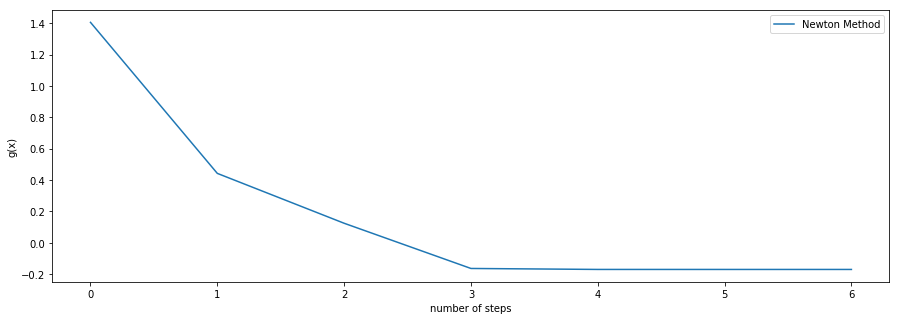

In [9]:
#Newton_method in 1-dimension. 
def newton_method1(w0, g, dwdg, dw2dg2, epsilon):
    w = w0
    g_val = g(w)
    results = [g_val]
    g_gradient = dwdg(w)
    g_hessian = dw2dg2(w)
    while abs(g_gradient)> epsilon:
        w = w - g_gradient/g_hessian

        #Update Step
        results.append(g(w))
        g_gradient = dwdg(w)
        g_hessian = dw2dg2(w)
    return w, results[-1], results

#Function to minimize
g = lambda w: np.multiply(1/50,(np.dot(np.dot(w.T,w).T,np.dot(w.T,w))+np.dot(w.T,w)+np.multiply(10,w)))

#First Derivative
dwdg = grad(g)

#Second Derivative
dw2dg2 = grad(dwdg)

#Machine Epsilon
epsilon = np.finfo(np.float32).eps

#Initial Value
w0 = np.array([2.5])[np.newaxis,:]

#Run newtons method
newton_method1= newton_method1(w0, g, dwdg, dw2dg2, epsilon)

#Print the Results
print("Newton Method Optimal Value:", newton_method1[1])
print("Newton Method Optimal Input Value:", round(newton_method1[0][0,0], 4))
print("Number of update steps for Newton Method:",str(len(newton_method1[2])),"\n")

#Graph Results
plt.plot([x[0,0] for x in newton_method1[2]], label='Newton Method')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()

# Chapter 4: Exercises 5 - Newtons method II

1. Use the first order condition to determine the unique  stationary point of the function $g(\mathbf{w})=\log(1+e^{\mathbf{w}^T\mathbf{w}})$ when the $N=2$
2. Make a surface plot of the function $g(\mathbf{w})$ or use the second order definition of convexity to verify that $g(\mathbf{w})$ is convex, implying that the stationary point found in part a) is a global minimum.
3. Perform Newton’s method to find the minimum of the function $g (\mathbf{w})$ determined in part a). Initialize your algorithm at $\mathbf{w}^0=I_{N\times 1}$ and make a plot of the cost function history plot for ten iterations of Newton’s method in order to verify that your algorithm works properly and is converging. 
4. Now run your Newton’s method code from part c) again, this time ini- tializing at the point $\mathbf{w}^0=4\cdot 1_{N\times 1}$. While this initialization is further away from the unique minimum of $g(\mathbf{w})$ than the one used in part c) your Newton’s method algorithm should converge faster starting at this point. At first glance this result seems very counterintuitive, as we (rightfully) expect that an initial point closer to a minimum will provoke more rapid convergence of Newton’s method!
Can you explain why this result actually makes sense for the particular function $g(\mathbf{w})$ we are minimizing here? Or, in other words, why the minimum of the second order Taylor series approximation of g (w) centered at $\mathbf{w}^0=4\cdot 1_{N\times 1}$ is essentially the minimum of $g(\mathbf{w})$  itself?

**---Part 1---**

First note $ \nabla g(\mathbf{w}) = (1+e^{\mathbf{w^*}^T\mathbf{w^*}})^{-1}\cdot e^{\mathbf{w^*}^T\mathbf{w^*}}\cdot2\mathbf{w^*} =(1+e^{w_1^2+w_2^2})^{-1}\cdot e^{w_1^2+w_2^2}\cdot2 \cdot\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$, the FOC is $(1+e^{w_1^2+w_2^2})^{-1}\cdot e^{w_1^2+w_2^2}\cdot2 \cdot\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}=\mathbf{0}$,  this clearly implies that $w_1^*=w_2^* = 0$.

**---Part 2---**

$\frac{\partial g(\mathbf{w})}{\partial w_i} = (1+e^{w_i^2+w_j^2})^{-1}\cdot e^{w_i^2+w_j^2}\cdot2 w_i \Rightarrow \frac{\partial^2 g(\mathbf{w})}{\partial^2 w_i} = \frac{2e^{w_j^2+w_i^2}((1+e^{w_j^2+w_i^2})+2w_i^2)}{(1+e^{w_j^2+w_i^2})^2}$. Since since a square is positive and $\forall x (e^x>0)$ we have that  $\frac{\partial^2 g(\mathbf{w})}{\partial^2 w_i}$ is positive, wlog we can come to the same conclusion form $\frac{\partial^2 g(\mathbf{w})}{\partial^2 w_j}>0$, therefore g is strictly convex on both dimension. 

**---Part 3---**

Below is the code/graph. Note that I'm referring to 3rd edition of Watt's book in which convergence criteria for the Newton method is when $\nabla g(\mathbf{w^{k-1}})\approx 0$. 

Newton Method Optimal Value: 0.6931471805599453
Newton Method Optimal Input Value: 0.0
Number of update steps for Newton Method: 5 



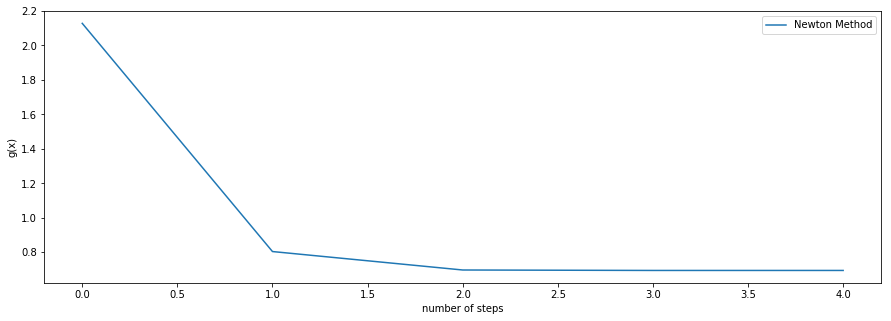

In [20]:
from autograd import hessian

#Newton_method in 2-dimension. That works w/ continous
#partial derivatives, so we can reshape Hessian into square 
# easily by invoking young's theorem. 
def newton_method2(w0, g, gradient, hess, epsilon, N):
    w = w0
    results = [g(w)[0,0]]
    g_gradient = gradient(w)
    g_hessian = hess(w)
    g_hessian.shape = (N,N)
    e = np.array([epsilon]*N)[:,np.newaxis]
    
    while (np.absolute(g_gradient)> epsilon).all():
        w = w - np.dot(np.linalg.inv(g_hessian), g_gradient)

        #Update Step
        results.append(g(w)[0,0])
        g_gradient = gradient(w)
        g_hessian = hess(w)
        g_hessian.shape = (N,N)
    return w, results[-1], results

#Function to minimize
g = lambda w: np.log(1+np.exp(np.dot(w.T,w)))

#Gradient
gradient = grad(g)

#Hessian 
hess = hessian(g)

#Machine Epsilon
epsilon = np.finfo(np.float32).eps

#Initial Value
w0 = np.array([1,1])[:,np.newaxis]

#Run newtons method
newton_method_1_1= newton_method2(w0, g, gradient, hess, epsilon, 2)


#Print the Results
print("Newton Method Optimal Value:", newton_method_1_1[1])
print("Newton Method Optimal Input Value:", round(newton_method_1_1[0][0,0], 4))
print("Number of update steps for Newton Method:",str(len(newton_method_1_1[2])),"\n")

#Graph Results
plt.plot(newton_method_1_1[2], label='Newton Method')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()

**---Part 4---**
Explanation of why. Further away from the optimum value the ratio between the partial and the hessian is large, therefore in a way the function is flat, but steep and this allows larger step towards optimum. Close to the optimum the partial is closer to zero (by the FOC) so naturally the curvature overtakes the partial and so our algorithm takes smaller steps. 
This is analogous to the problem we had in our first order methods when the local optimization algorithm crawls to the optimum when it is in some epsilon ball of the optimum. 


Newton Method Optimal Value: 0.6931471805599453
Newton Method Optimal Input Value: 0.0
Number of update steps for Newton Method: 2 



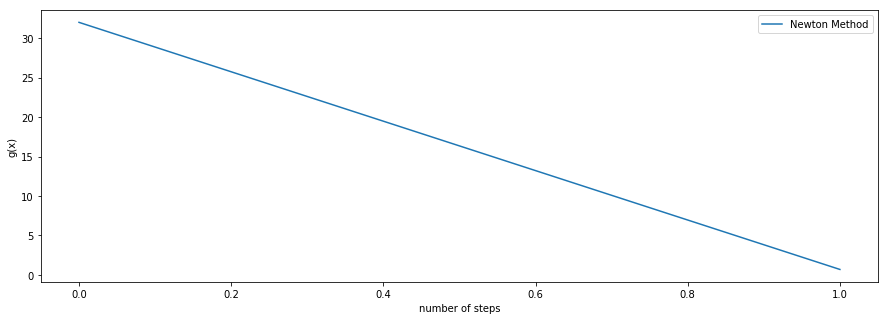

In [22]:
newton_method_4_4= newton_method2(w0, g, gradient, hess, epsilon, 2)


#Print the Results
print("Newton Method Optimal Value:", newton_method_4_4[1])
print("Newton Method Optimal Input Value:", round(newton_method_4_4[0][0,0], 4))
print("Number of update steps for Newton Method:",str(len(newton_method_4_4[2])),"\n")

#Graph Results
plt.plot(newton_method_4_4[2], label='Newton Method')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()


# Chapter 4: Exercises 6 - Newton's method and Square Root

Use Newton’s method to compute a square root of the number: 999. Briefly explain how you set up the relevant cost function that was minimized to obtain this square root. Explain how you use zero or first order optimization methods (detailed in Chapters 2 and 3) to do this as well.

$g(w) = w^2-999= 0$ so we essentially have a moment condition, so we can take the first order taylor series expansion  and solve for the value that makes this equation equal zero. $g(w) = g(w_0)+g^\prime(w_0)(w-w_0)=0 \Rightarrow  w = w_0 - \frac{g(w_0)}{g^\prime(w_0)}$. This will be how we update below: 

Newton Method Optimal Value: [[2.21509708e-08]]
Newton Method Optimal Input Value: [[31.60696126]]
Number of update steps for Newton Method: 13 



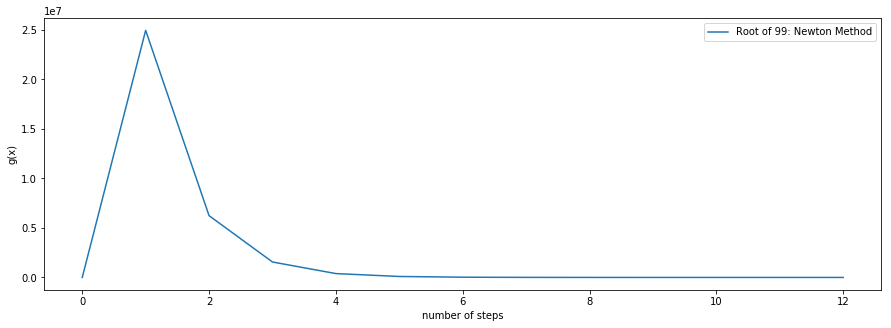

In [28]:
#Newton_method in 1-dimension. 
def root_newton_method(w0, g, epsilon):
    #Get derivative of input function g
    dwdg = grad(g)

    #initial values
    w = w0
    g_val = g(w)
    g_gradient = dwdg(w)
    results = [g_val]

    while abs(g_val)> epsilon:
        w = w - g_val/g_gradient

        #Update Step
        g_val = g(w)
        results.append(g(w))
        g_gradient = dwdg(w)

    return w, results[-1], results


#Function to minimize
g = lambda w: np.dot(w.T,w)- 999

#Initial Value
w0 = np.array([0.1])[:,np.newaxis]

#Machine Epsilon
epsilon = np.finfo(np.float32).eps

#Run newtons method
rootof_99= root_newton_method(w0, g, epsilon)


#Print the Results
print("Newton Method Optimal Value:", rootof_99[1])
print("Newton Method Optimal Input Value:", rootof_99[0])
print("Number of update steps for Newton Method:",str(len(rootof_99[2])),"\n")

#Graph Results
plt.plot([x[0,0] for x in rootof_99[2]], label='Root of 99: Newton Method')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()


# Chapter 4: Exercises 7 - Non Convex regularization using Newton's method 
Use Newtons method to minimize g(w)=cos(w), w/ initial point $w^0=0.1$


Below is the code/graph. Note that I'm referring to 3rd edition of Watt's book in which convergence criteria for the Newton method is when $\nabla g(\mathbf{w^{k-1}})\approx 0$. 

In [ ]:
#regularized Newton_method in 1-dimension. 
def reg_newton_method3(w0, g, dwdg, dw2dg2, epsilon):
    k=0
    w = w0
    g_val = g(w)
    results = [g_val]
    g_gradient = dwdg(w)
    g_hessian = dw2dg2(w)

    e = lambda  x: x+2
    while abs(g_gradient)> epsilon:
        w = w - g_gradient/(g_hessian+e(g_hessian))

        #Update Step
        results.append(g(w))
        g_gradient = dwdg(w)
        g_hessian = dw2dg2(w)
        k+=1
    return w, results[-1], results

#Function to minimize
g = lambda w: np.cos(w)

#First Derivative
dwdg = grad(g)

#Second Derivative
dw2dg2 = grad(dwdg)

#Machine Epsilon
epsilon = np.finfo(np.float32).eps

#Initial Value
w0 = np.array([0.1])[np.newaxis,:]
 
K=20

#Run newtons method
newton_method1= reg_newton_method3(w0, g, dwdg, dw2dg2, epsilon)


#Print the Results
print("Newton Method Optimal Value:", newton_method1[1])
print("Newton Method Optimal Input Value:", round(newton_method1[1][0,0], 4))
print("Number of update steps for Newton Method:",str(len(newton_method1[2])),"\n")

#Graph Results
plt.plot([x[0,0] for x in newton_method1[2]], label='Newton Method')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()

# Chapter 4 Exercise 8:  Show that regularized Newtons method decreases
Rigorously verify that when $\epsilon$ is set large enough to convexify the regu- larized second order approximation that the corresponding Newton step is indeed a descent direction. That is, regardless of the function g being mini- mized that $\epsilon$ can be set large enough so that a corresponding Newton step can lead to a lower portion of the function i.e., $g(w^k)\le g(w^{k-1})$

**Proof**
Wlog let's restrict ourselves to 1-dimension. 


The update procedure is as follows: $w^k = w^{k-1}-\frac{g^\prime(w^{k-1})}{g^{\prime\prime}(w^{k-1}) +\epsilon}$. 

Regularization implies $w^k-w^{k-1}= -\frac{g^\prime(w^{k-1})}{g^{\prime\prime}(w^{k-1})+\epsilon}$ we will use this substitution in the steps below:


\begin{align*}
g(w^k)&=g(w^{k-1})+g^\prime(w^{k-1})(w^k-w^{k-1})+ \frac{1}{2}g^{\prime\prime}(w^{k-1})(w^k-w^{k-1})^2 \\ 
%
&\le g(w^{k-1})+g^\prime(w^{k-1})(w^k-w^{k-1})+ \frac{1}{2}g^{\prime\prime}(w^{k-1})(w^k-w^{k-1})^2 +\frac{\epsilon}{2}|w^k-w^{k-1}|^2\\
%
g(w^k) - g(w^{k-1}) &\le g^\prime(w^{k-1})(w^k-w^{k-1})+ \frac{1}{2}g^{\prime\prime}(w^{k-1})(w^k-w^{k-1})^2 +\frac{\epsilon}{2}|w^k-w^{k-1}|^2\\
%
&= -\frac{g^\prime(w^{k-1})^2}{g^{\prime\prime}(w^{k-1})+\epsilon}+ \frac{1}{2}g^{\prime\prime}(w^{k-1})(\frac{g^\prime(w^{k-1})}{g^{\prime\prime}(w^{k-1})+\epsilon})^2 +\frac{\epsilon}{2}|\frac{g^\prime(w^{k-1})}{g^{\prime\prime}(w^{k-1})+\epsilon}|^2\\
%
&=-\frac{g^\prime(w^{k-1})^2}{g^{\prime\prime}(w^{k-1})+\epsilon}+ \frac{1}{2}g^{\prime\prime}(w^{k-1})(\frac{g^\prime(w^{k-1})}{g^{\prime\prime}(w^{k-1})+\epsilon})^2 +\frac{\epsilon}{2}(\frac{g^\prime(w^{k-1})}{g^{\prime\prime}(w^{k-1})+\epsilon})^2\\
%
&=-\frac{g^\prime(w^{k-1})^2}{g^{\prime\prime}(w^{k-1})+\epsilon}\frac{2\cdot({g^{\prime\prime}(w^{k-1})+\epsilon})^2)}{2\cdot({g^{\prime\prime}(w^{k-1})+\epsilon})^2)}+ \frac{1}{2}g^{\prime\prime}(w^{k-1})(\frac{g^\prime(w^{k-1})}{g^{\prime\prime}(w^{k-1})+\epsilon})^2 +\frac{\epsilon}{2}(\frac{g^\prime(w^{k-1})}{g^{\prime\prime}(w^{k-1})+\epsilon})^2 \\
&=\frac{1}{2}\frac{g^\prime(w^{k-1})^2}{(g^{\prime\prime}(w^{k-1})+\epsilon)^2}[-2\cdot(g^{\prime\prime}(w^{k-1})+\epsilon)^2 + g^{\prime\prime}(w^{k-1})+\epsilon]\\
\end{align*}

We can satisfy
\begin{align*}
-2\cdot(g^{\prime\prime}(w^{k-1})+\epsilon)^2 + g^{\prime\prime}(w^{k-1})+\epsilon\le 0
\end{align*}
if we set $\epsilon \ge \max\{2-g^{\prime\prime}(w^{k-1}),0\}$.
It follows that for these values of $\epsilon$ we have that $g(w^k) - g(w^{k-1}) \le \frac{1}{2}\frac{g^\prime(w^{k-1})^2}{(g^{\prime\prime}(w^{k-1})+\epsilon)^2}[-2\cdot(g^{\prime\prime}(w^{k-1})+\epsilon)^2 + g^{\prime\prime}(w^{k-1})+\epsilon] \le 0 \Rightarrow g(w^k) \le g(w^{k-1})$ as required. 




# Chapter 5: Exercise 1

Fit a linear model to the U.S. student load debt dataset shown in Figure 1 by minimizing the associated linear regression Least Squares problem using a single Newton step (also known as solving the normal equations). If this linear trend continues what will be the total student debt be in 2050?

For this problem I add an intercept to the model is: $student\_debt = \alpha+\beta*year$

 Note that I'm referring to 3rd edition of Watt's book in which convergence criteria for the Newton method is when $\nabla g(\mathbf{w^{k-1}})\approx 0$. 

Optimal intercept using Newton Method Method Optimal Input Value: -160.72904515266418
Optimal Coefficient using Newton Method Method Optimal Input Value: 0.08032441744580865
Number of update steps for Newton Method: 2 

Regression Prediction for student debt in 2050: [3.93601061] 



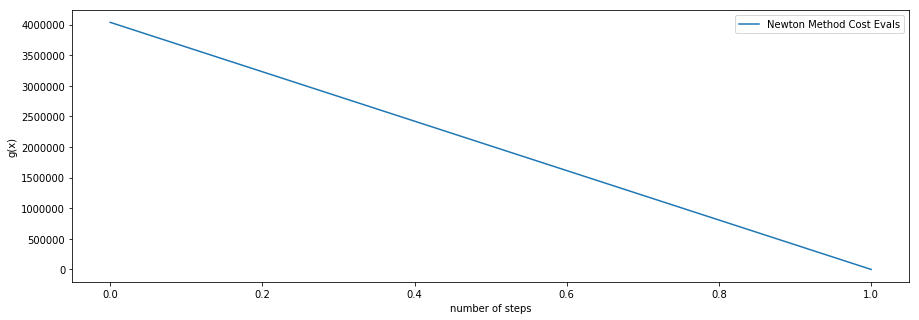

In [30]:
from autograd import grad
from autograd import numpy as np
from autograd import hessian


# import the dataset
csvname = 'datasets/student_debt_data.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data. 
x = data[0:1,:].T

#add intercept to the regression
one = np.ones(np.shape(x))
X = np.concatenate((one, x), axis=1)
y = data[1:,:].T
n = len(x)

#Function to minimize 1/n*(X*beta-y).T*(X*beta-y)
g = lambda theta: (1/n)*np.dot((np.dot(X,theta)-y).T,(np.dot(X,theta)-y))

#Gradient
gradient = grad(g)

#Hessian 
hess = hessian(g)

#Machine Epsilon
epsilon = np.finfo(np.float32).eps

#Initial Value
w0 = np.array([1,1])[:,np.newaxis]

#Run newtons method (from problem Chapter 4: Exercise 5)  & get predictions
student_debt= newton_method2(w0, g, gradient, hess, epsilon, 2)
beta = student_debt[0]
debt_eq = lambda year: beta[0]+ beta[1]*year

print("Optimal intercept using Newton Method Method Optimal Input Value:",float(student_debt[0][0]))
print("Optimal Coefficient using Newton Method Method Optimal Input Value:",float(student_debt[0][1]))
print("Number of update steps for Newton Method:",str(len(student_debt[2])),"\n")
print("Regression Prediction for student debt in 2050:",str(debt_eq(2050)),"\n")

#Graph Results
plt.plot(student_debt[2], label='Newton Method Cost Evals')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()

# Starter code for Chapter 7 Exercise 10 using the multi-class Perceptron instead of the multi-class Softmax cost 


Recognizing handwritten digits is a popular multi-class classification prob- lem commonly built into the software of mobile banking applications, as well as more traditional Automated Teller Machines, to give users e.g., the ability to automatically deposit paper checks. Here each class of data consists of (images of) several handwritten version of a single digit in the range 0   9, giving a total of 10 classes.
In Figure 7.20 we illustrate the accelerated convergence of mini-batch gra- dient descent over the standard method using P = 50, 000 random training points from the MNIST dataset, a popular collection of handwritten images like those described above, and the multi-class Softmax cost. In particular we show a comparison of the first 10 steps / epochs of both methods, using a batch of size 200 for the mini-batch size and the same steplength for both runs, where we see that the mini-batch run drastically accelerates minimization in terms of both the cost function (left panel) and number of misclassifications (right panel).
Re-create this Figure by implementing mini-batch gradient descent.Re- create this Figure by implementing mini-batch gradient descent. You may not get precisely the same results based on your implementation, initialization of the algorithm, etc., however you should be able to re-create the general e↵ect.
 

Load in data - using `sklearn` import functionality.

input shape =  (784, 70000)
output shape =  (1, 70000)
(785, 10)
Grad. Desc.[200] Optimal Value: 3818.72064683077
Grad. Desc.[200] Optimal Input Value: [-1.33743538e+00  1.07537134e+00  2.20788988e+00 ... -6.28239343e-02
 -1.26215217e-01 -6.25534263e-05]
Number of update steps for Grad. Desc.[200] : 2501 

Grad. Desc.[full] Optimal Value: 127557.92568347584
Grad. Desc.[full] Optimal Input Value: [-1.52295380e-01  2.32331345e-01 -5.76901227e-02 ... -6.28239343e-02
 -1.26215217e-01 -6.25534263e-05]
Number of update steps for Grad. Desc.[full] : 11 



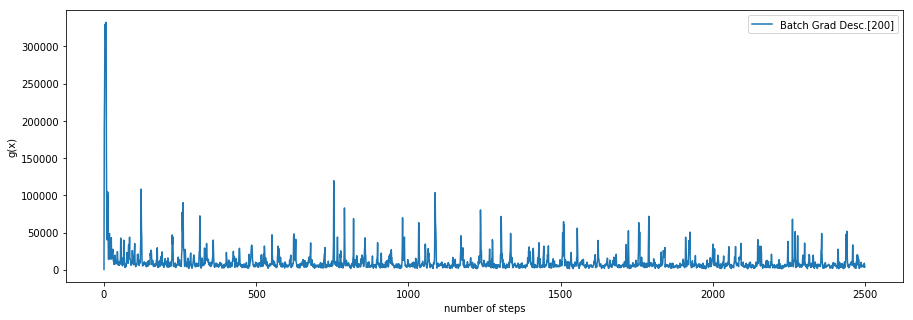

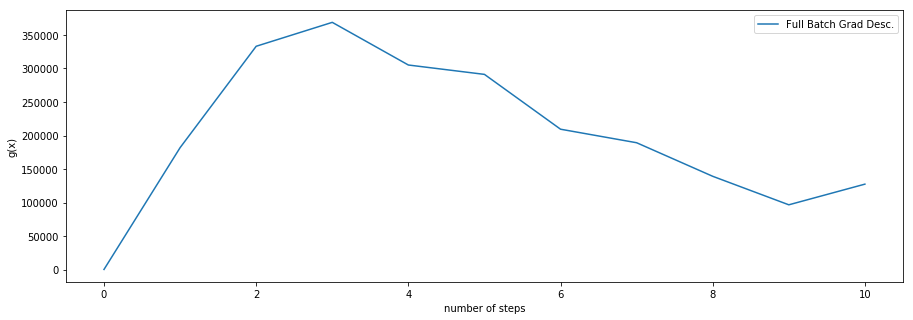

In [46]:
from sklearn.datasets import fetch_mldata

# strip off input / output pairs
mnist = fetch_mldata('MNIST original')
x = mnist.data.T
y = mnist.target[np.newaxis,:]

print("input shape = " , x.shape)
print("output shape = ", y.shape)

# sample indices
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
def multiclass_perceptron(w,iter):
    # get subset of points
    x_p = x_sample[:,iter]
    y_p = y_sample[:,iter]

    # pre-compute predictions on all points
    all_evals = model(x_p,w)

    # compute maximum across data points
    a =  np.max(all_evals,axis = 0)        

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_p.astype(int).flatten(),np.arange(np.size(y_p))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y_p))

#Batch gradient descent. Redefining because it is slightly different from the one in Chapter 3: Exercise 14
def batch_gradient_descent(g, dwdg, K, alpha, w0, batchsize, P):
    k = 0
    w = np.copy(w0)
    g_val = g(w,range(0,P))
    results = [g_val]

    while k<K:
        for i in range(0,P,batchsize):
            w_next = w-alpha(k)*dwdg(w,range(i,i+batchsize))
            results.append(g(w_next,range(i,i+batchsize)))
            w = w_next
        k+=1
    return w, results[-1], results


# create a matrix of weights to evaluate mult-class cost
N = x_sample.shape[0]
C = len(np.unique(y_sample))
w0 = 0.1*np.random.randn(N+1,C)
print (w0.shape)

# input function multiclass_perceptron
g = multiclass_perceptron
dgdw = grad(g)

#### Parameters for Descent
P= 50000 

#Alpha = 10^0
alpha = lambda k: 10**0

#Iterations
K = 10

#Full Batch Size 
perceptron_batch200= batch_gradient_descent(g, dgdw, K, alpha, w0, 200, P)

#Full Gradient Descent
perceptron_full= batch_gradient_descent(g, dgdw, K, alpha, w0, P, P)

#Print the Results
print("Grad. Desc.[200] Optimal Value:", perceptron_batch200[1])
print("Grad. Desc.[200] Optimal Input Value:", perceptron_batch200[0].flatten())
print("Number of update steps for Grad. Desc.[200] :",str(len(perceptron_batch200[2])),"\n")

print("Grad. Desc.[full] Optimal Value:", perceptron_full[1])
print("Grad. Desc.[full] Optimal Input Value:", perceptron_full[0].flatten())
print("Number of update steps for Grad. Desc.[full] :",str(len(perceptron_full[2])),"\n")


#Graph Results
plt.plot(  perceptron_batch200[2], label='Batch Grad Desc.[200]')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()

#Graph Results
plt.plot(perceptron_full[2], label='Full Batch Grad Desc.')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()

For a sanity check we allow the number of iterations/epochs to be 100

Grad. Desc.[200] Optimal Value: 5251.645850137503
Grad. Desc.[200] Optimal Input Value: [-8.21243538e+00  9.82037134e+00  1.85028899e+01 ... -6.28239343e-02
 -1.26215217e-01 -6.25534263e-05]
Number of update steps for Grad. Desc.[200] : 25001 

Grad. Desc.[full] Optimal Value: 5504.674853568757
Grad. Desc.[full] Optimal Input Value: [-2.36575380e-01  1.87591345e-01  2.15898773e-02 ... -6.28239343e-02
 -1.26215217e-01 -6.25534263e-05]
Number of update steps for Grad. Desc.[full] : 101 



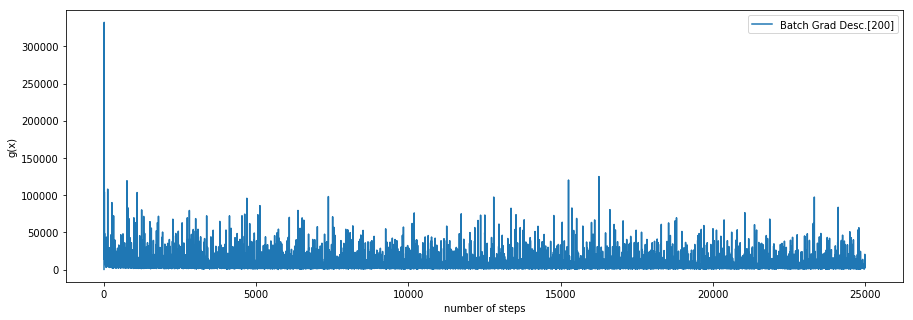

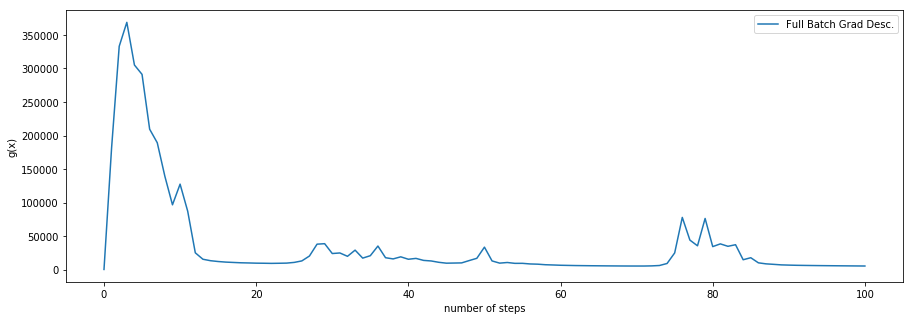

In [47]:
#Iterations
K = 100

#Full Batch Size 
perceptron_batch200= batch_gradient_descent(g, dgdw, K, alpha, w0, 200, P)

#Full Gradient Descent
perceptron_full= batch_gradient_descent(g, dgdw, K, alpha, w0, P, P)

#Print the Results
print("Grad. Desc.[200] Optimal Value:", perceptron_batch200[1])
print("Grad. Desc.[200] Optimal Input Value:", perceptron_batch200[0].flatten())
print("Number of update steps for Grad. Desc.[200] :",str(len(perceptron_batch200[2])),"\n")

print("Grad. Desc.[full] Optimal Value:", perceptron_full[1])
print("Grad. Desc.[full] Optimal Input Value:", perceptron_full[0].flatten())
print("Number of update steps for Grad. Desc.[full] :",str(len(perceptron_full[2])),"\n")


#Graph Results
plt.plot(  perceptron_batch200[2], label='Batch Grad Desc.[200]')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()

#Graph Results
plt.plot(perceptron_full[2], label='Full Batch Grad Desc.')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[15,5]
plt.rcParams["font.size"]=10
plt.show()